In [ ]:
# Import libraries for data manipulation, visualization, and analysis.
import pandas as pd  # For data manipulation and analysis.
import matplotlib.pyplot as plt  # For creating visualizations.
import seaborn as sns  # For advanced data visualization.

In [ ]:
# Load UFO data from a CSV file, skipping problematic lines.
ufo_data = pd.read_csv("complete.csv", on_bad_lines="skip")

# Filter the data to include only UFO sightings in the United States.
ufo_data = ufo_data[ufo_data["country"] == "us"]

C:\Users\alden\AppData\Local\Temp\ipykernel_22196\642900797.py:1: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  ufo_data = pd.read_csv("complete.csv", on_bad_lines = "skip")


In [ ]:
# Load data about traditional alien movies from a CSV file.
alien_movies = pd.read_csv("traditional_alien_movies.csv")

# Convert the 'Release Date' column to datetime format for easier manipulation.
alien_movies["Release Date"] = pd.to_datetime(alien_movies["Release Date"])

# Create a new column combining year and quarter for time-based analysis.
alien_movies["Year and Quarter"] = alien_movies["Release Date"].dt.year + alien_movies["Release Date"].dt.quarter / 4

# Print the processed alien movie data.
print(alien_movies)

                            Title  \
0                Independence Day   
1      E.T. the Extra-Terrestrial   
2                  Men in Black 3   
3               War of the Worlds   
4                            Home   
5             Monsters vs. Aliens   
6                Edge of Tomorrow   
7                          Pixels   
8   The Day the Earth Stood Still   
9                         Arrival   
10                    The X Files   

                                           Movie Info  Year  \
0   The aliens are coming and their goal is to inv...  1996   
1   A troubled child summons the courage to help a...  1982   
2   Agent J travels in time to M.I.B.'s early days...  2012   
3   An alien invasion threatens the future of huma...  2005   
4   An alien on the run from his own people makes ...  2015   
5   A woman transformed into a giant after she is ...  2009   
6   A soldier fighting aliens gets to relive the s...  2014   
7   When aliens misinterpret video feeds of classi.

C:\Users\alden\AppData\Local\Temp\ipykernel_22196\3510805062.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  alien_movies["Release Date"] = pd.to_datetime(alien_movies["Release Date"])


In [ ]:
# Fix any invalid datetime values in the 'datetime' column.
ufo_data["datetime"] = ufo_data["datetime"].apply(
    lambda x: x if not x.endswith("24:00") else x[:-5] + "00:00"
)

# Convert the 'datetime' column to datetime format for easier manipulation.
ufo_data["datetime"] = pd.to_datetime(ufo_data["datetime"])

# Create a new column combining year and quarter for time-based analysis.
ufo_data["Year and Quarter"] = ufo_data["datetime"].dt.year + ufo_data["datetime"].dt.quarter / 4

# Print the processed 'Year and Quarter' data.
print(ufo_data["Year and Quarter"])

0        1950.00
3        1957.00
4        1961.00
5        1962.00
7        1966.00
          ...   
88674    2013.75
88675    2013.75
88676    2013.75
88677    2013.75
88678    2013.75
Name: Year and Quarter, Length: 70293, dtype: float64


In [ ]:
# Group UFO data by 'Year and Quarter' and count the number of reports.
reports_by_date = ufo_data.groupby("Year and Quarter").size().reset_index()

# Extract the year from the 'Year and Quarter' column for merging with population data.
reports_by_date["Year"] = (reports_by_date["Year and Quarter"] // 1).astype("int")

# Load population data from a CSV file.
population_data = pd.read_csv("fred_population.csv")

# Convert the 'observation_date' column to datetime format.
population_data["observation_date"] = pd.to_datetime(population_data["observation_date"])

# Extract the year from the 'observation_date' column.
population_data["Year"] = population_data["observation_date"].dt.year

# Merge UFO report data with population data on the 'Year' column.
reports_by_date = reports_by_date.merge(right=population_data, on="Year")

# Rename and drop columns for clarity.
reports_by_date["Report Count"] = reports_by_date[0]
reports_by_date.drop(labels=0, axis="columns", inplace=True)

# Calculate the number of UFO reports per capita.
reports_by_date["Reports per Capita"] = reports_by_date["Report Count"] / reports_by_date["POPTOTUSA647NWDB"]

# Print the processed data for analysis.
print(reports_by_date)

     Year and Quarter  Year observation_date  POPTOTUSA647NWDB  Report Count  \
0             1960.00  1960       1960-01-01         180671000             9   
1             1960.25  1960       1960-01-01         180671000             5   
2             1960.50  1960       1960-01-01         180671000            24   
3             1960.75  1960       1960-01-01         180671000            22   
4             1961.00  1961       1961-01-01         183691000             5   
..                ...   ...              ...               ...           ...   
214           2013.50  2013       2013-01-01         316059947          1328   
215           2013.75  2013       2013-01-01         316059947          2236   
216           2014.00  2014       2014-01-01         318386329          2001   
217           2014.25  2014       2014-01-01         318386329          1480   
218           2014.50  2014       2014-01-01         318386329           639   

     Reports per Capita  
0          4.

{'Title': 'Independence Day', 'Movie Info': "The aliens are coming and their goal is to invade and destroy Earth. Fighting superior technology, mankind's best weapon is the will to survive.", 'Year': 1996, 'Domestic Sales (in $)': 306169268, 'Release Date': Timestamp('1996-07-03 00:00:00'), 'Genre': "['Action', 'Adventure', 'Sci-Fi']", 'Year and Quarter': 1996.75}
{'Title': 'E.T. the Extra-Terrestrial', 'Movie Info': 'A troubled child summons the courage to help a friendly alien escape from Earth and return to his home planet.', 'Year': 1982, 'Domestic Sales (in $)': 437141279, 'Release Date': Timestamp('1982-06-11 00:00:00'), 'Genre': "['Adventure', 'Family', 'Sci-Fi']", 'Year and Quarter': 1982.5}
{'Title': 'Men in Black 3', 'Movie Info': "Agent J travels in time to M.I.B.'s early days in 1969 to stop an alien from assassinating his friend Agent K and changing history.", 'Year': 2012, 'Domestic Sales (in $)': 179020854, 'Release Date': Timestamp('2012-05-23 00:00:00'), 'Genre': "['Ac

(1980.0, 2019.85)

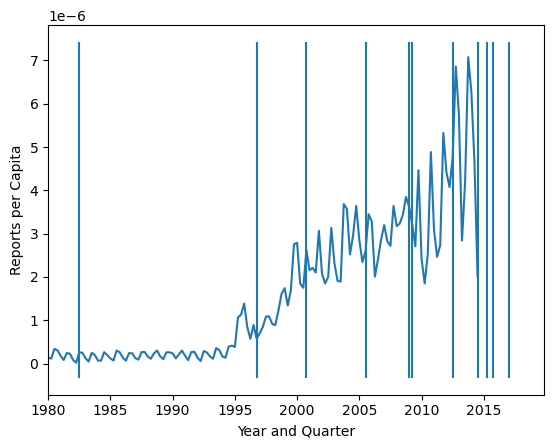

In [ ]:
# Create a line plot showing UFO reports per capita over time.
line_plot = sns.lineplot(data=reports_by_date, x="Year and Quarter", y="Reports per Capita")

# Get the y-axis limits for adding vertical lines.
ymax, ymin = line_plot.get_ylim()

# Add vertical lines to the plot for each alien movie release.
for movie in alien_movies.to_dict(orient="records"):
    print(movie)  # Print movie details for debugging.
    line_plot.vlines(x=movie["Year and Quarter"], ymin=ymin, ymax=ymax)

# Set the x-axis limit to start from the year 1980.
line_plot.set_xlim(left=1980)